In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import random as rd

from sklearn.metrics import accuracy_score

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [4]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


id = 1154
다음 그림은 Frog 입니다.


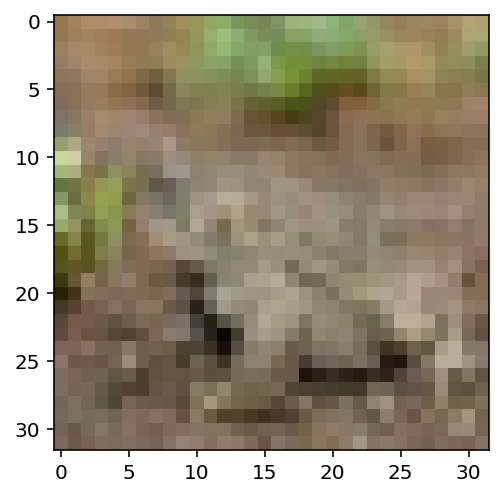

In [5]:
id = rd.randrange(0, 10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[y_test[id][0]]))
plt.imshow(x_test[id])
plt.show()

In [6]:
print('max :', x_train.max(),' min :', x_train.min())

max : 255  min : 0


In [7]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

In [9]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [11]:
# Scaling
max_n, min_n = x_train.max(), x_train.min()

print(x_train.max(), x_train.min())
x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)
print(x_train.max(), x_train.min())

255 0
1.0 0.0


In [12]:
# to categorical
from tensorflow.keras.utils import to_categorical

class_n = len(np.unique(y_train))
print(y_train.shape)
y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)
print(y_train.shape)

(50000, 1)
(50000, 10)


In [13]:
# 1. Session Clear
keras.backend.clear_session()

# 2. Model
model = keras.models.Sequential()

# 3. Layer Add
model.add(keras.layers.Input(shape=(32, 32, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 4. Compile
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,001,546
Trainable params: 2,001,546
Non-

In [15]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [22]:
# 5. fit
history = model.fit(x_train, y_train, validation_split=0.2, callbacks=[es], 
                    verbose=1, epochs=50)

Epoch 1/50
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0850 - accuracy: 0.1837 - val_loss: 2.0718 - val_accuracy: 0.1904
Epoch 2/50
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0676 - accuracy: 0.1905 - val_loss: 2.0863 - val_accuracy: 0.1909
Epoch 3/50
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0537 - accuracy: 0.1947 - val_loss: 2.0612 - val_accuracy: 0.1973
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0636 - accuracy: 0.1931 - val_loss: 2.0494 - val_accuracy: 0.1934
Epoch 5/50
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0974 - accuracy: 0.1814 - val_loss: 2.0743 - val_accuracy: 0.1973
Epoch 6/50
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0767 - accuracy: 0.1871 - val_loss: 2.0614 - val_accuracy: 0.1872
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0643 - accuracy: 0.1932 - val_loss: 2.1499 - val_accuracy:

In [23]:
performance_test = model.evaluate(x_test, y_test)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 2.0415 - accuracy: 0.1999
Test Loss : 2.041512,  Test Accuracy : 19.990%


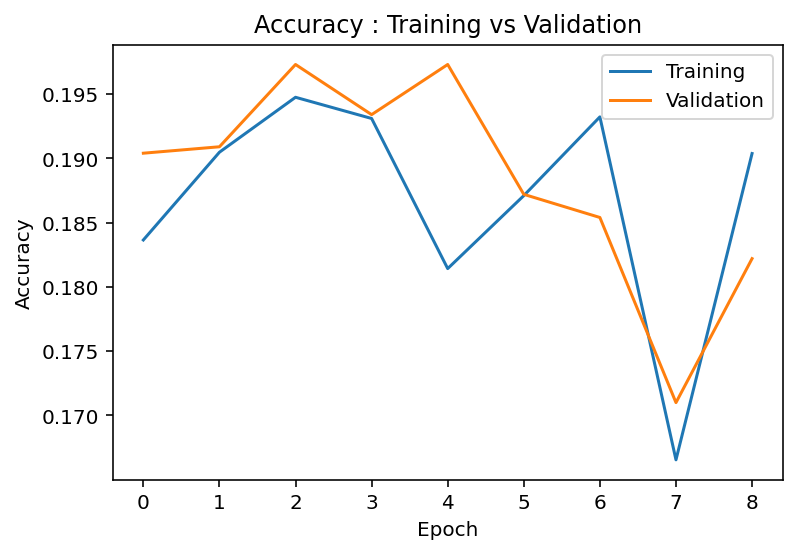

In [24]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

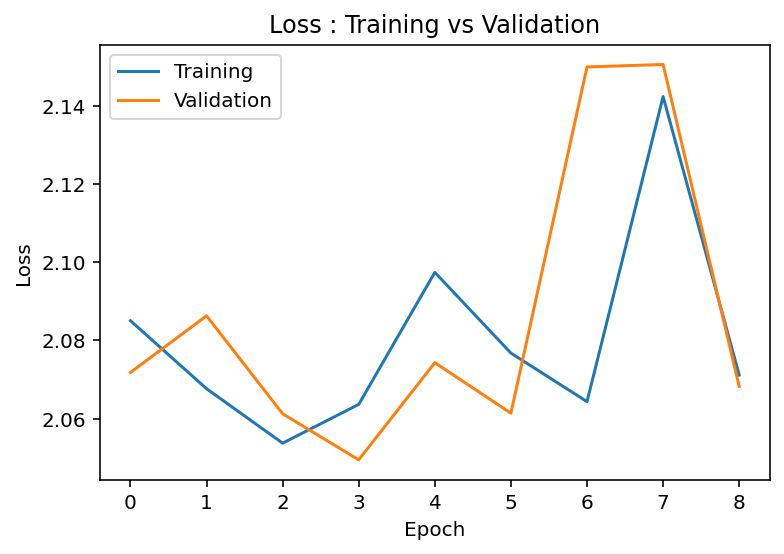

In [25]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [26]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(y_train.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(y_test.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 19.70%
테스트 정확도 : 19.99%


id = 8110
다음 그림은 Dog 입니다.
모델의 예측 : Horse
모델의 카테고리별 확률 : 
{'Airplane': 3.0, 'Automobile': 6.0, 'Bird': 14.0, 'Cat': 14.0, 'Deer': 12.0, 'Dog': 14.0, 'Frog': 13.0, 'Horse': 15.0, 'Ship': 1.0, 'Truck': 3.0}
틀렸어요


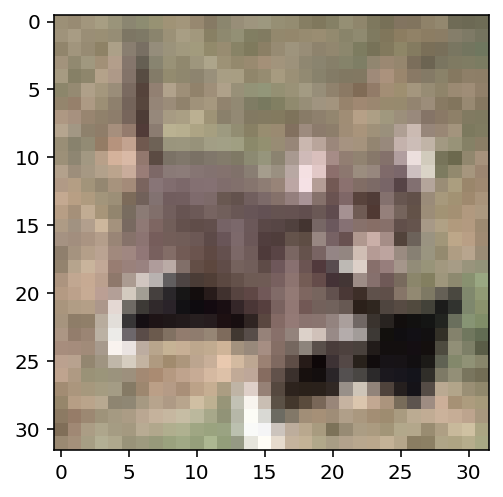

In [27]:
id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[y_test.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if y_test.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(x_test[id].reshape([32,32,-1]))
plt.show()